<a href="https://colab.research.google.com/github/talesoverfables/Neothink/blob/main/Phase%201/RandomForest%2B%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imblearn

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the datasets
corporate_task_path = 'corporate_task.csv'
employee_task_allocation_path = 'employee_task_allocation.csv'


In [ ]:
corporate_task_data = pd.read_csv(corporate_task_path)
employee_task_allocation_data = pd.read_csv(employee_task_allocation_path)

In [ ]:
# Encode skill levels and preprocess datasets
def encode_skill_level(skill):
    """Convert skill levels into numeric values."""
    mapping = {'Beginner': 1, 'Intermediate': 2, 'Advanced': 3}
    return mapping.get(skill, 0)

In [ ]:
# Apply encoding to skill columns in the employee dataset
skill_columns = ['Python_Skill', 'ML_Skill', 'Java_Skill', 'Data_Analysis_Skill',
                 'Deep_Learning_Skill', 'Web_Dev_Skill']

In [ ]:
for column in skill_columns:
    employee_task_allocation_data[column] = employee_task_allocation_data[column].apply(encode_skill_level)

In [ ]:
# Split 'required_skills' into individual components for the task dataset
corporate_task_data['required_skills'] = corporate_task_data['required_skills'].str.split(', ')

In [ ]:
# Compatibility Score Calculation
def calculate_compatibility(task_skills, employee_skills):
    """Calculate compatibility score based on task requirements and employee skills."""
    score = 0
    for skill in task_skills:
        score += employee_skills.get(skill, 0)
    return score

In [ ]:
# Create a compatibility score for each employee-task pair
compatibility_scores = []

In [ ]:
for _, task_row in corporate_task_data.iterrows():
    task_skills = task_row['required_skills']
    for _, emp_row in employee_task_allocation_data.iterrows():
        employee_skills = {skill: emp_row[skill_column] for skill, skill_column in zip(skill_columns, skill_columns)}
        score = calculate_compatibility(task_skills, employee_skills)
        compatibility_scores.append({
            'task_id': task_row['task_id'],
            'employee_id': emp_row['Employee_ID'],
            'compatibility_score': score,
            'availability_hours': emp_row['Availability_Hours'],
            'task_allocated': emp_row['Task_Allocated'],
            'priority': task_row['priority'],
            'complexity_level': task_row['complexity_level']
        })

In [ ]:
# Convert to DataFrame for ML model preparation
compatibility_data = pd.DataFrame(compatibility_scores)

In [ ]:
# Encode priority and complexity levels
priority_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
complexity_mapping = {'Beginner': 1, 'Intermediate': 2, 'Advanced': 3}


In [ ]:
compatibility_data['priority'] = compatibility_data['priority'].map(priority_mapping)
compatibility_data['complexity_level'] = compatibility_data['complexity_level'].map(complexity_mapping)

In [ ]:
# Prepare data for training
X = compatibility_data[['compatibility_score', 'availability_hours', 'priority', 'complexity_level']]
y = compatibility_data['task_allocated']  # 1 if already allocated, 0 otherwise


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Import the necessary library and class
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.578755

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.55      0.56    297181
           1       0.58      0.61      0.59    302819

    accuracy                           0.58    600000
   macro avg       0.58      0.58      0.58    600000
weighted avg       0.58      0.58      0.58    600000



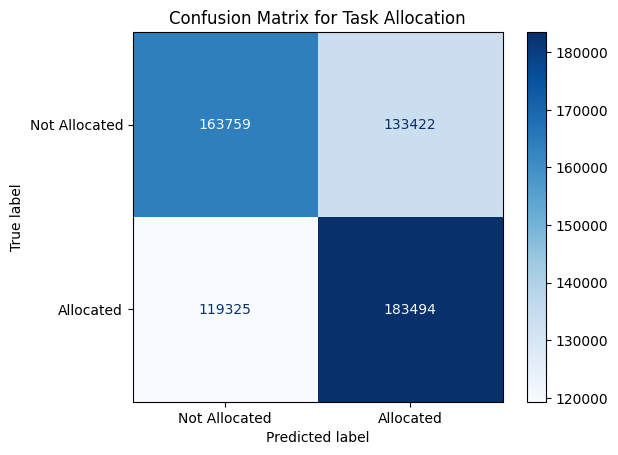

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Visualize confusion matrix with matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Allocated', 'Allocated'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Task Allocation')
plt.show()


In [ ]:
# Predict suitability for new tasks
compatibility_data['suitability_prediction'] = model.predict(X)


In [ ]:
# Save predictions
compatibility_data.to_csv('suitability_predictions.csv', index=False)
print("\nPredictions saved to 'suitability_predictions.csv'.")



Predictions saved to 'suitability_predictions.csv'.


In [ ]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Perform Grid Search for Hyperparameter Optimization
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.3min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.2min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.3min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.2min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.3min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.5min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.5min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.5min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.5min
[CV] END max_depth=10, min_sa

In [ ]:
# Get the best model from Grid Search
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

In [ ]:
# Evaluate the model
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# Predict suitability for new tasks
compatibility_data['suitability_prediction'] = best_model.predict(X)


In [ ]:
# Save predictions
compatibility_data.to_csv('suitability_predictions.csv', index=False)
print("\nPredictions saved to 'suitability_predictions.csv'.")